In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Two Autoencoder in "Iterative" training experiment results

## Complete Structure

<img src="CNN_block_struct.svg" width="1400">

## Autoencoder Structure  
* Activations
    * Hidden: elu
    * Output: tanh
* Loss: MSE  
* Batch: 256  

<img src="CNN_detail.svg" width="1400">

## Classifier  
* Activations  
    * Hidden: relu
    * Output: softmax
* Loss: Categorical Crossentropy  
* Batch: 32  

<img src="Classifier.png" width="400">


# Mnist Data with noising

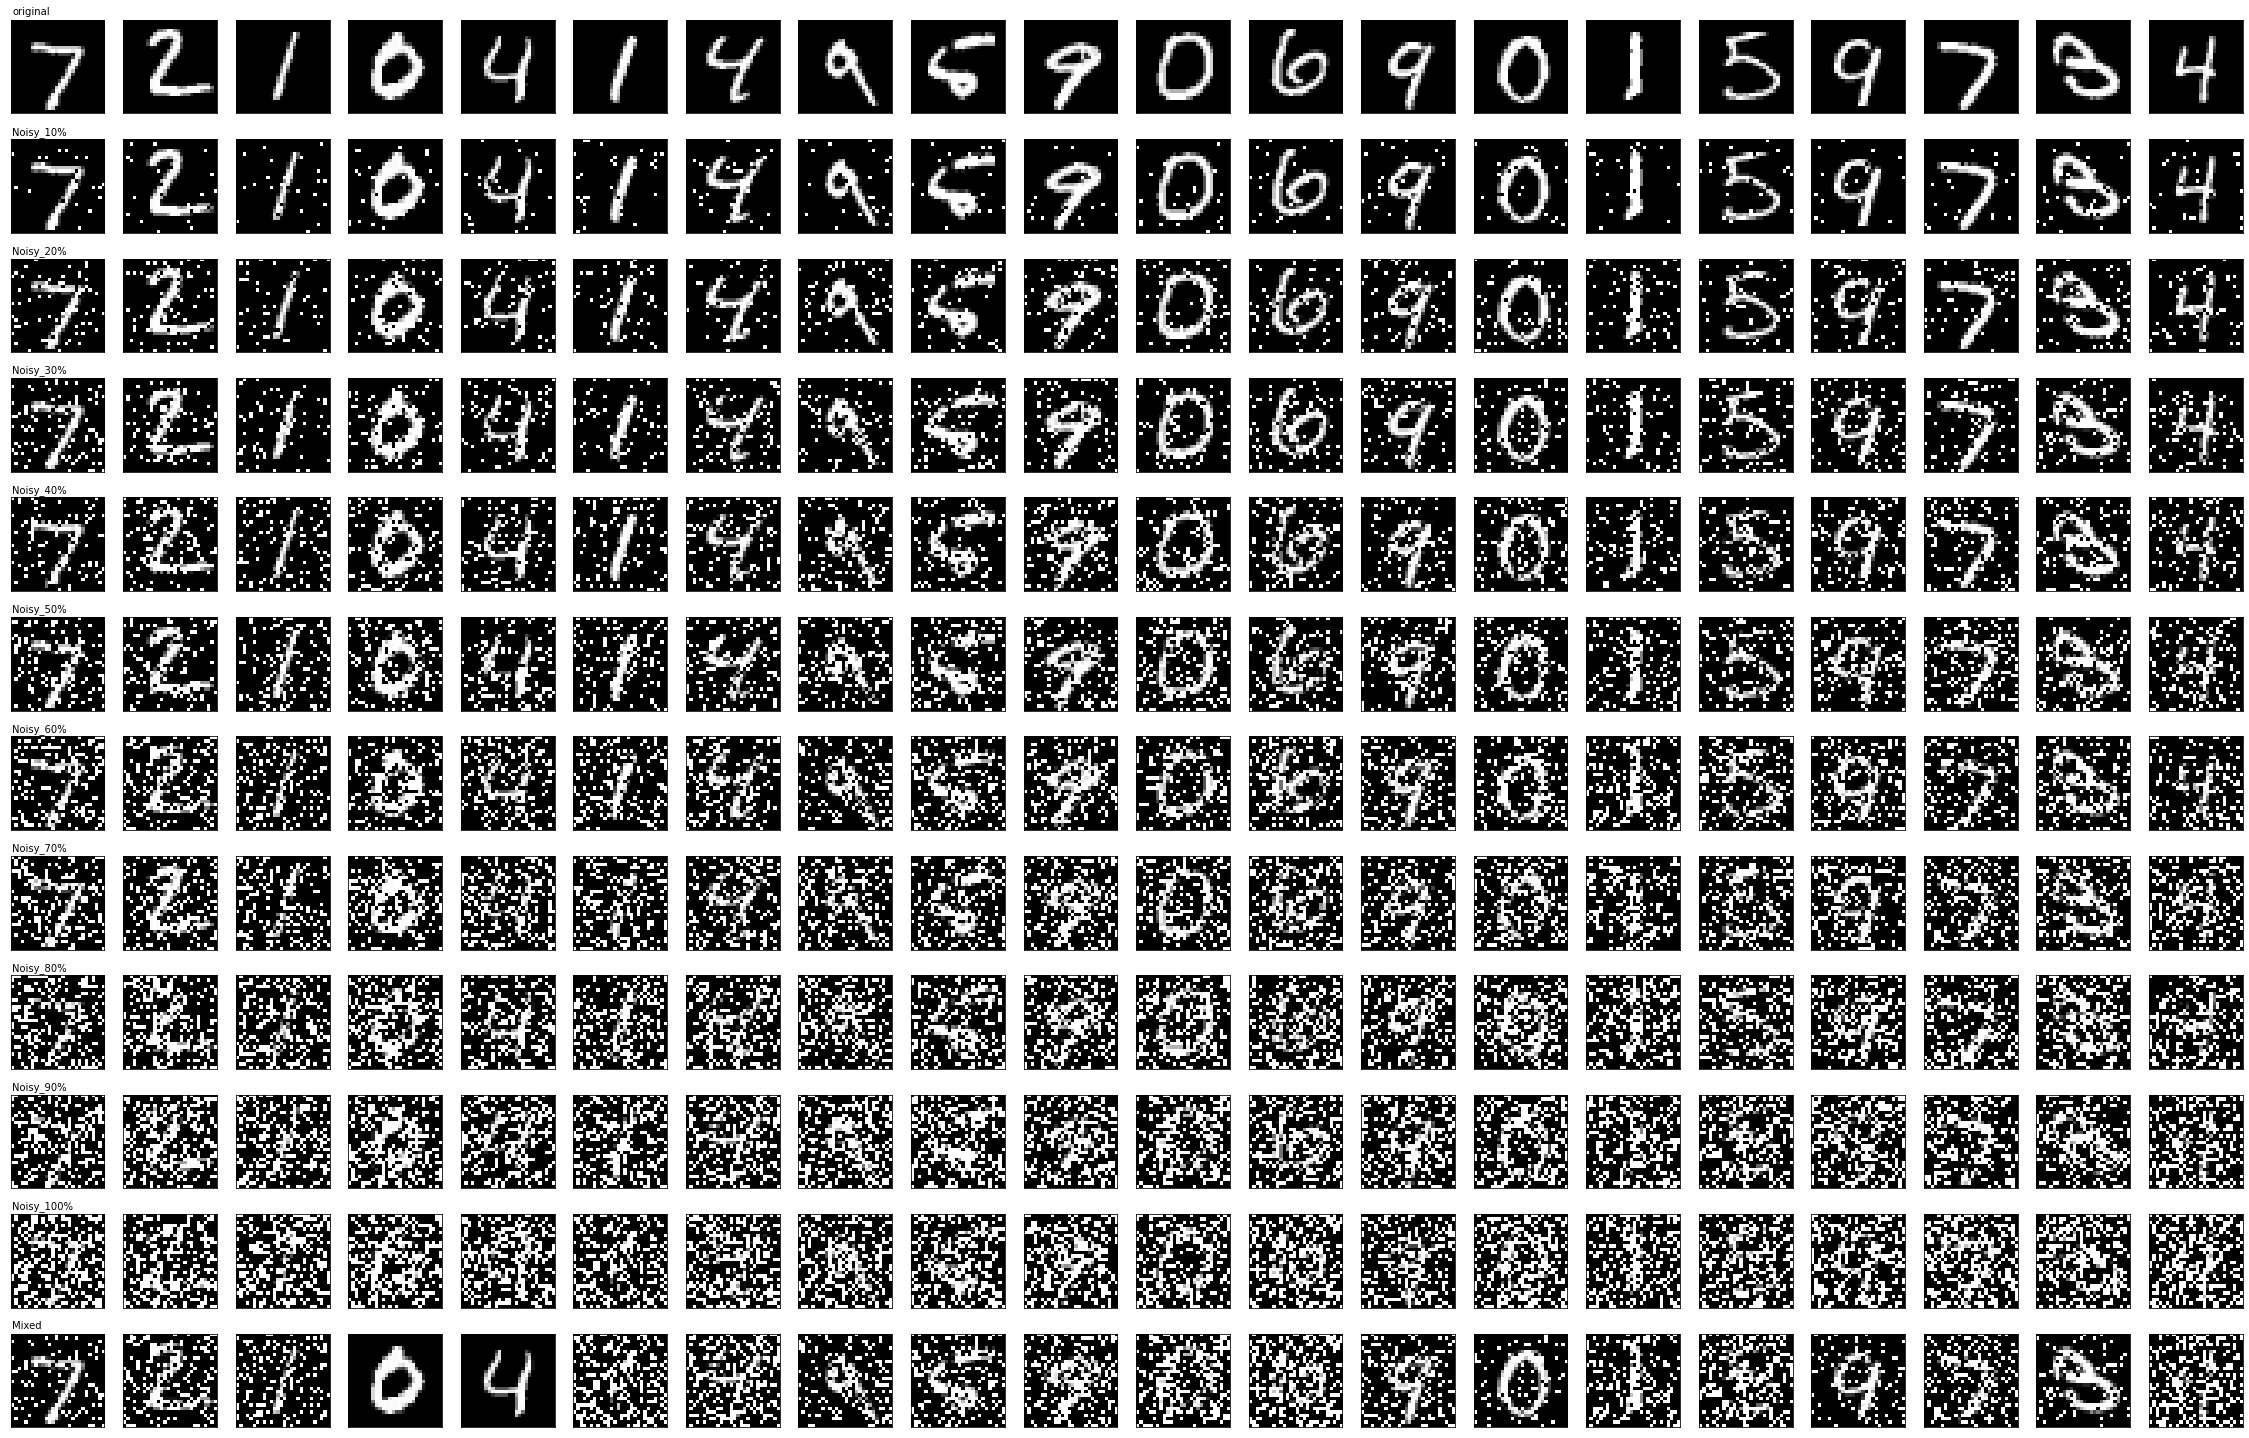

# Training structure (Decision Tree)

## Nosiy one level
Random renoised test DataSet of Mnist, $10k$ examples.

## Nosiy multiple levels

Test DataSet of Mnist concatenate with diferent noise levels probabilities from $0\%,10\%, \cdots ,100\%$, $11 \times 10000 = 110k$ examples.

## First idea
<img src="./Visualisations/CNN_structure.svg" width="1600">

## Refined $LR1$ and renoising
<img src="./Visualisations/CNN_filtered.svg" width="1600">

## Visual refinment with only usefull results remaining
<img src="./Visualisations/CNN_final.svg" width="1600">

## Further tested hypotheses

### Different types and levels of renoising between autoencoders only while training:
* Constant leve: All examples are renoised with the same probabilitie $\in [0\%,10\%, \cdots , 100\%]$
* Mixed: Each examples is independently renoised with a probabilitie  $\in [0\%,10\%, \cdots , 100\%]$
* Multi: Only used for Noisy multiple levels renoise each of the $11$ groups of $10000$ examples with one of the probabilities $\in [0\%,10\%, \cdots , 100\%]$

### Renoise in evaluation:
While evaluating renoise the prediction of the first autonecoder before the prediction of the second autoencoder.
The results where worse.
## Visual presentation of the best results

Input data: Original Mnist


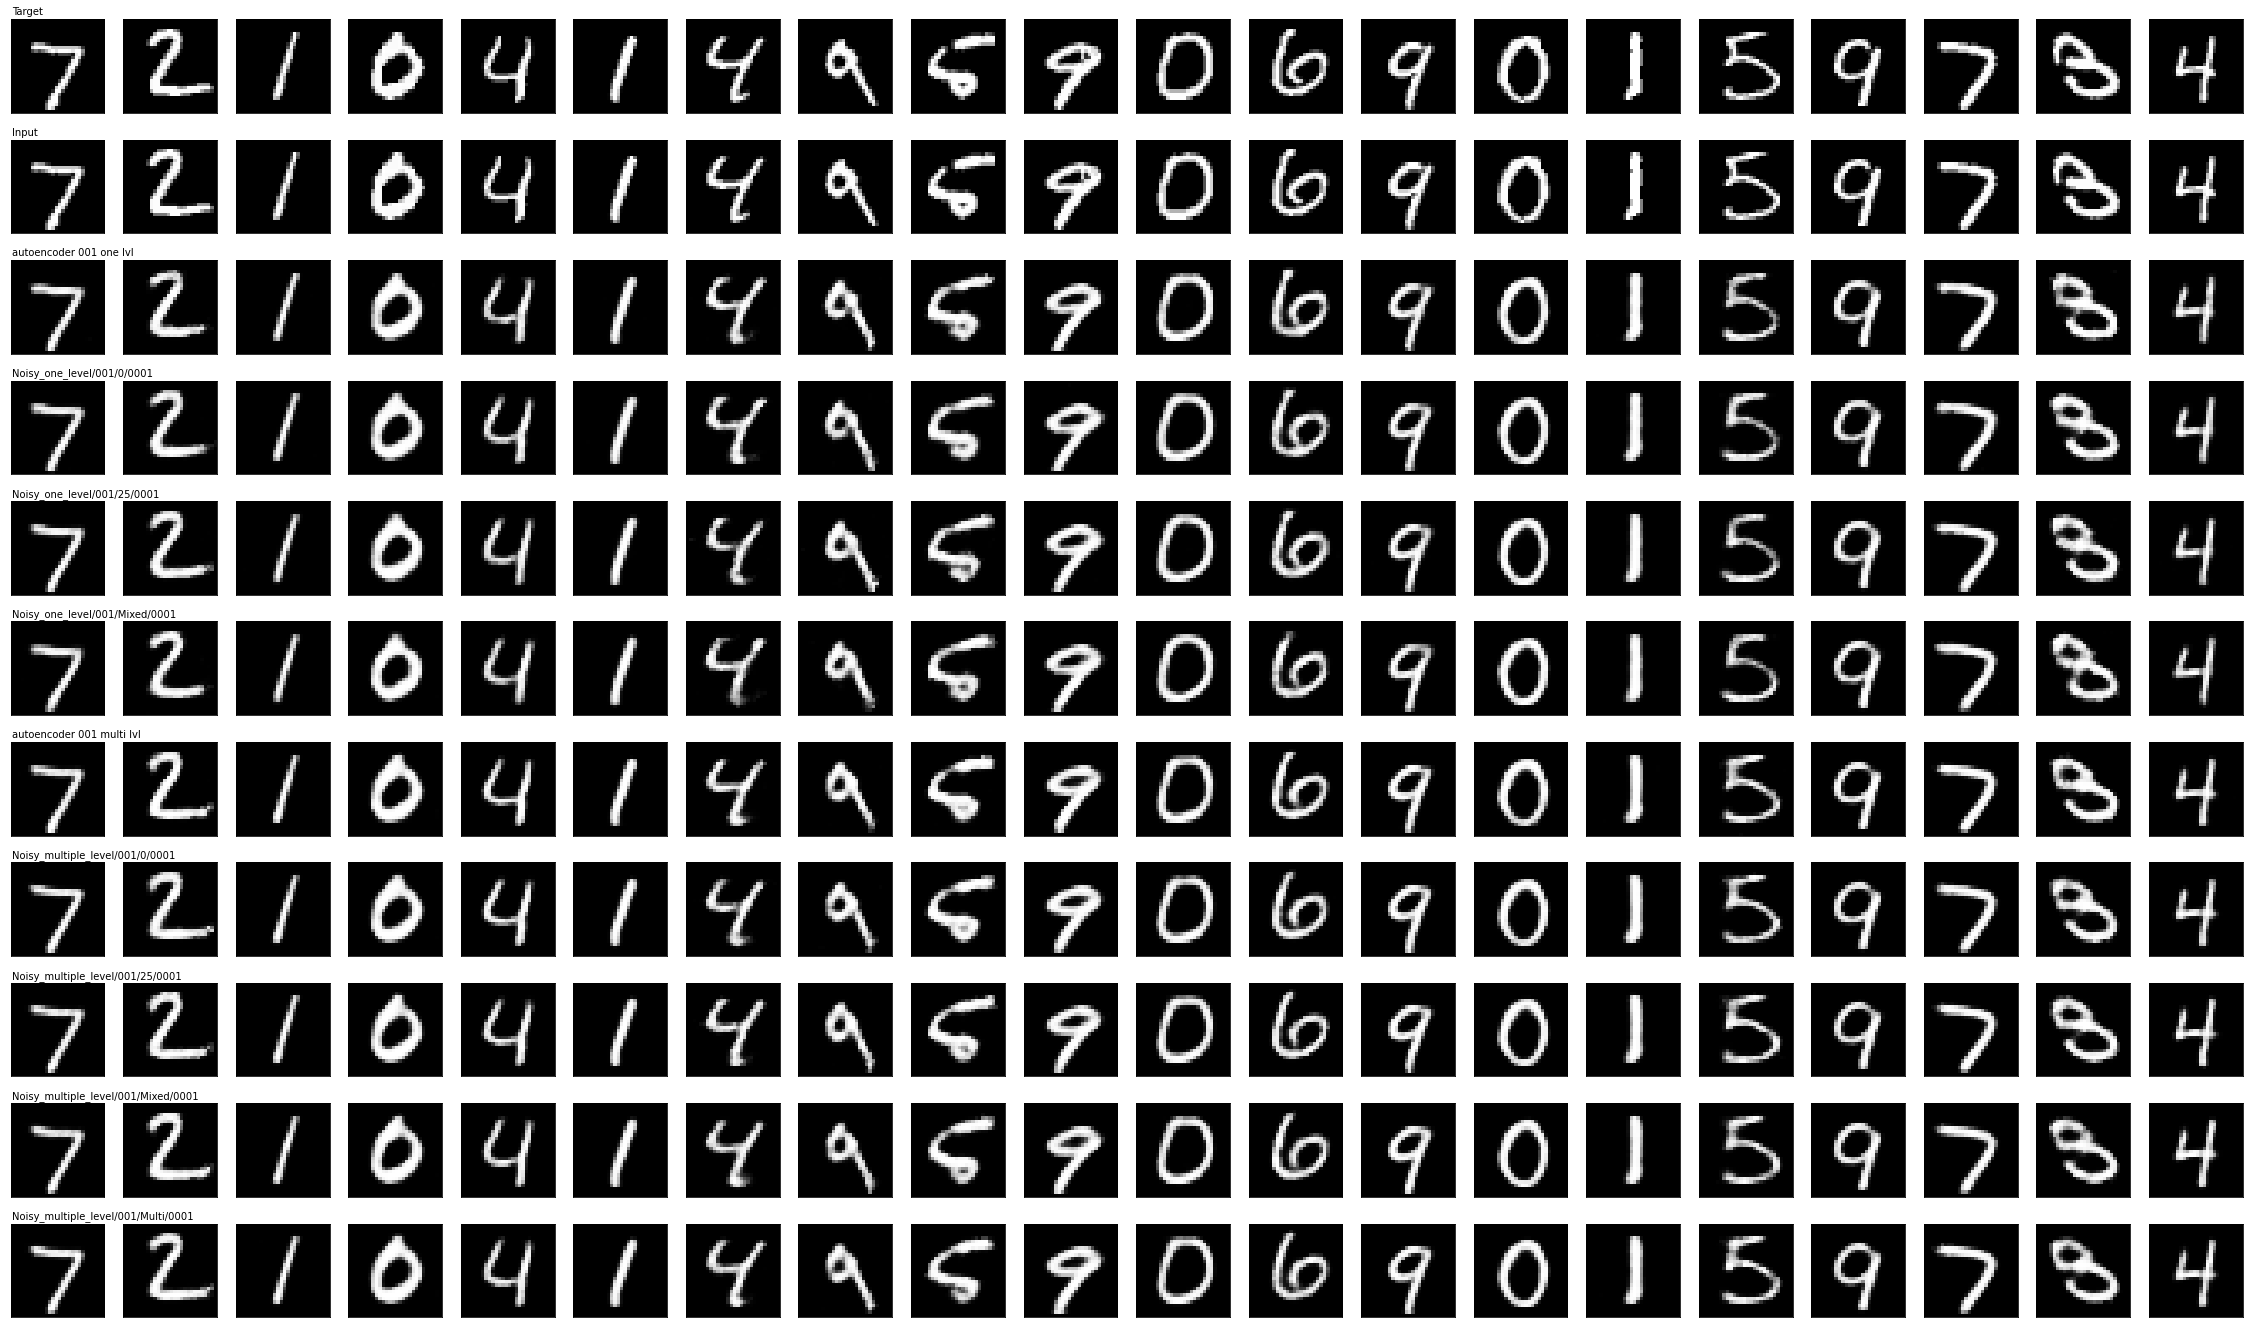

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data: Mnist with 20% Noise


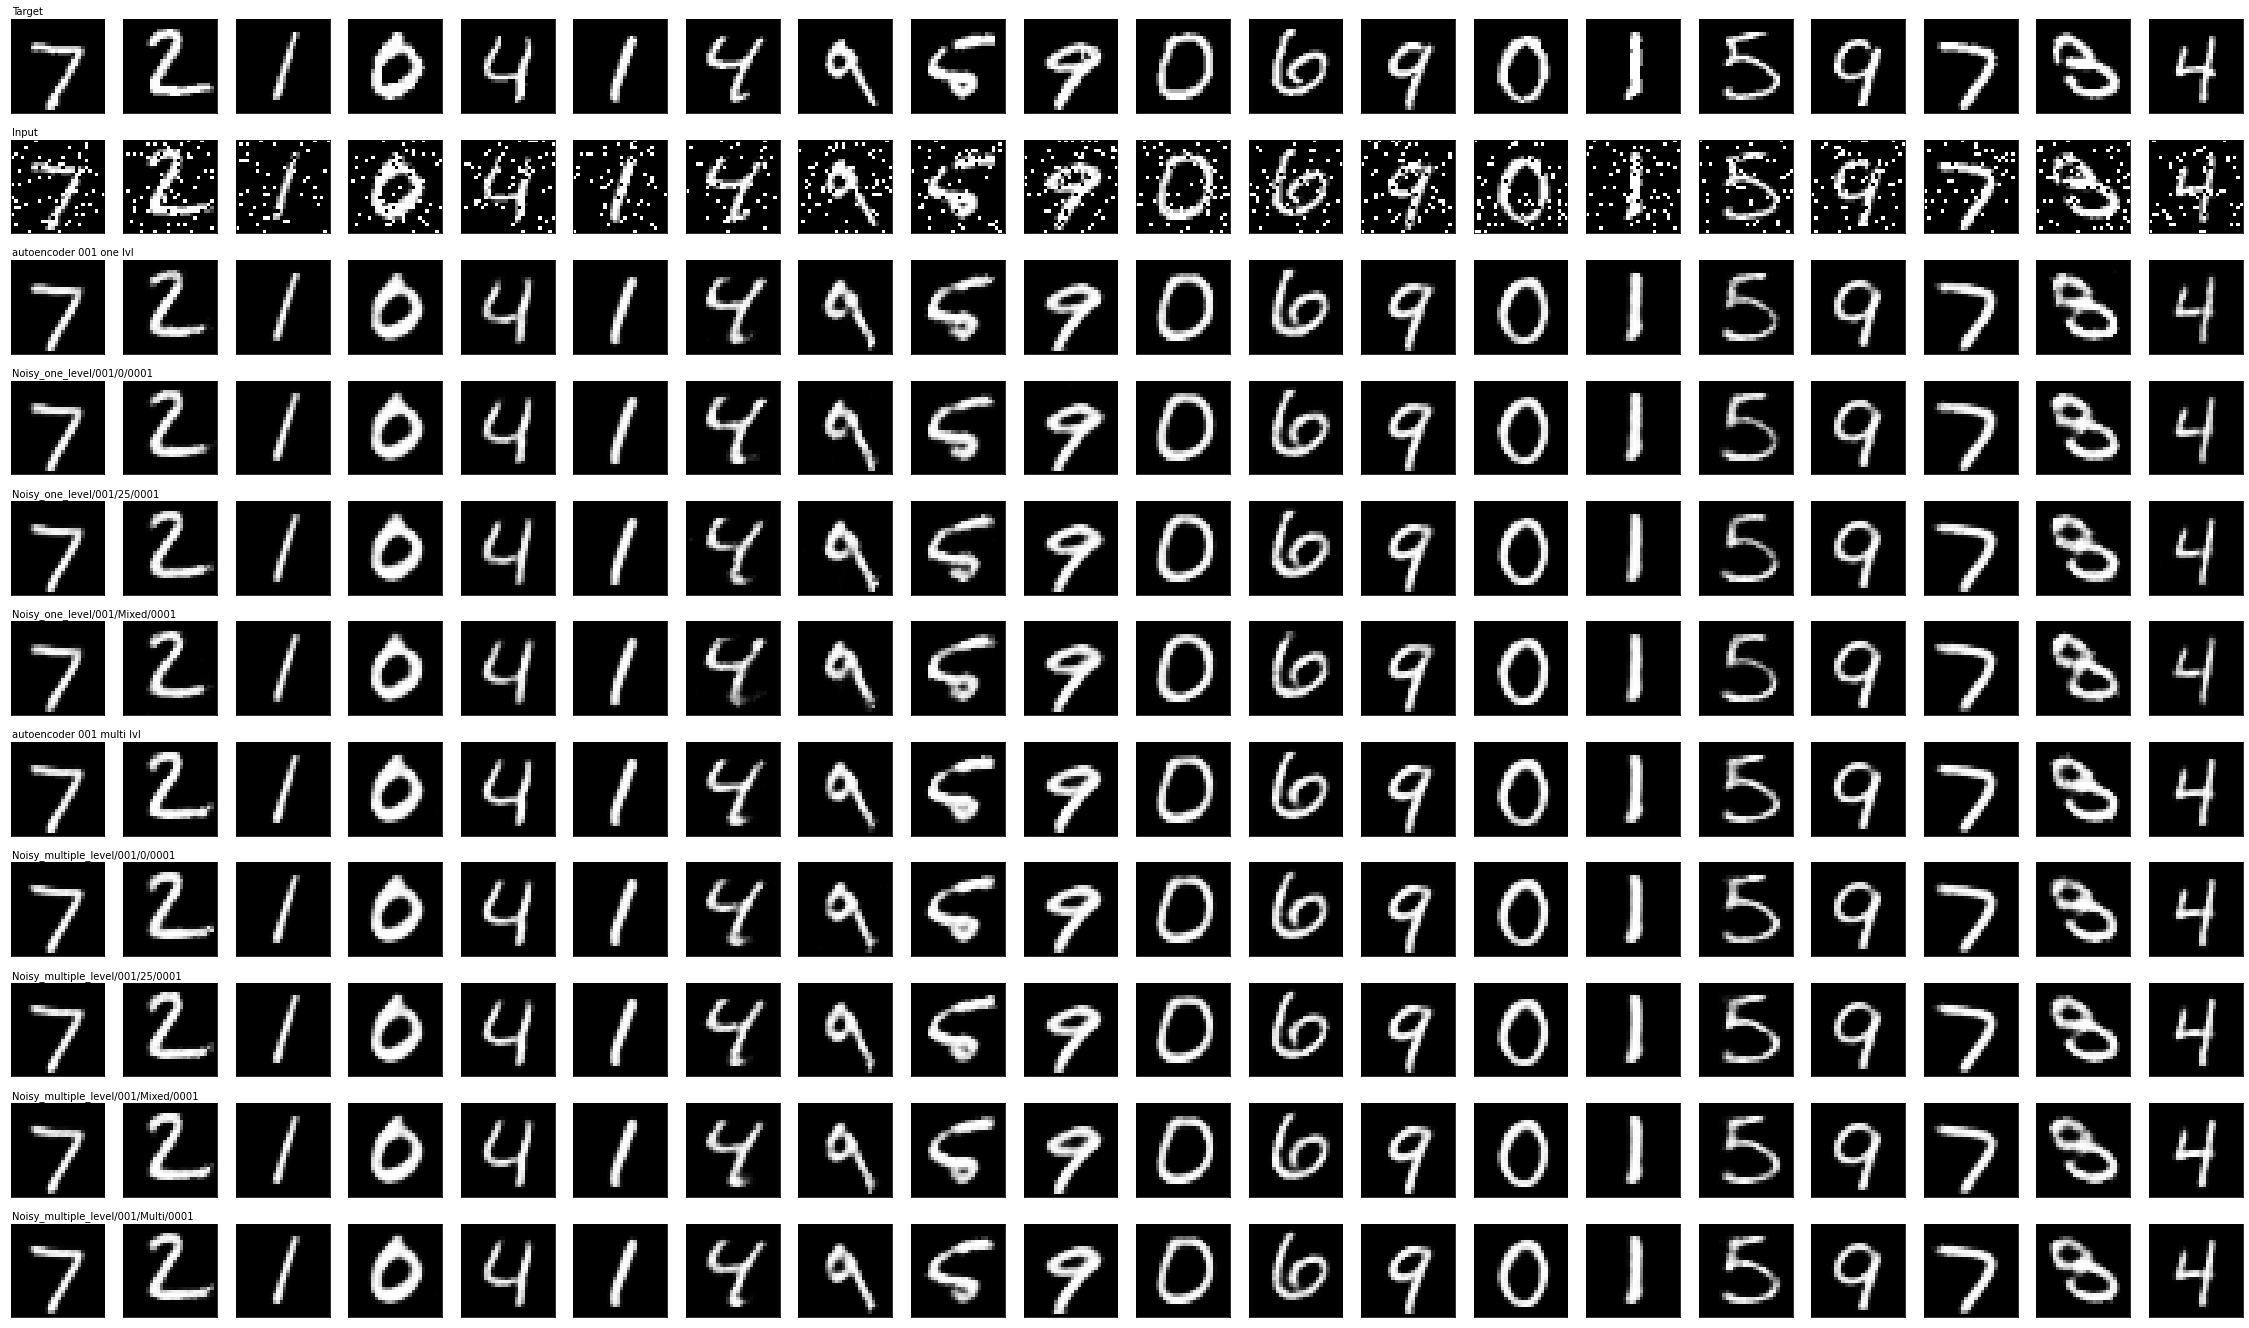

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data: Mnist with 50% Noise


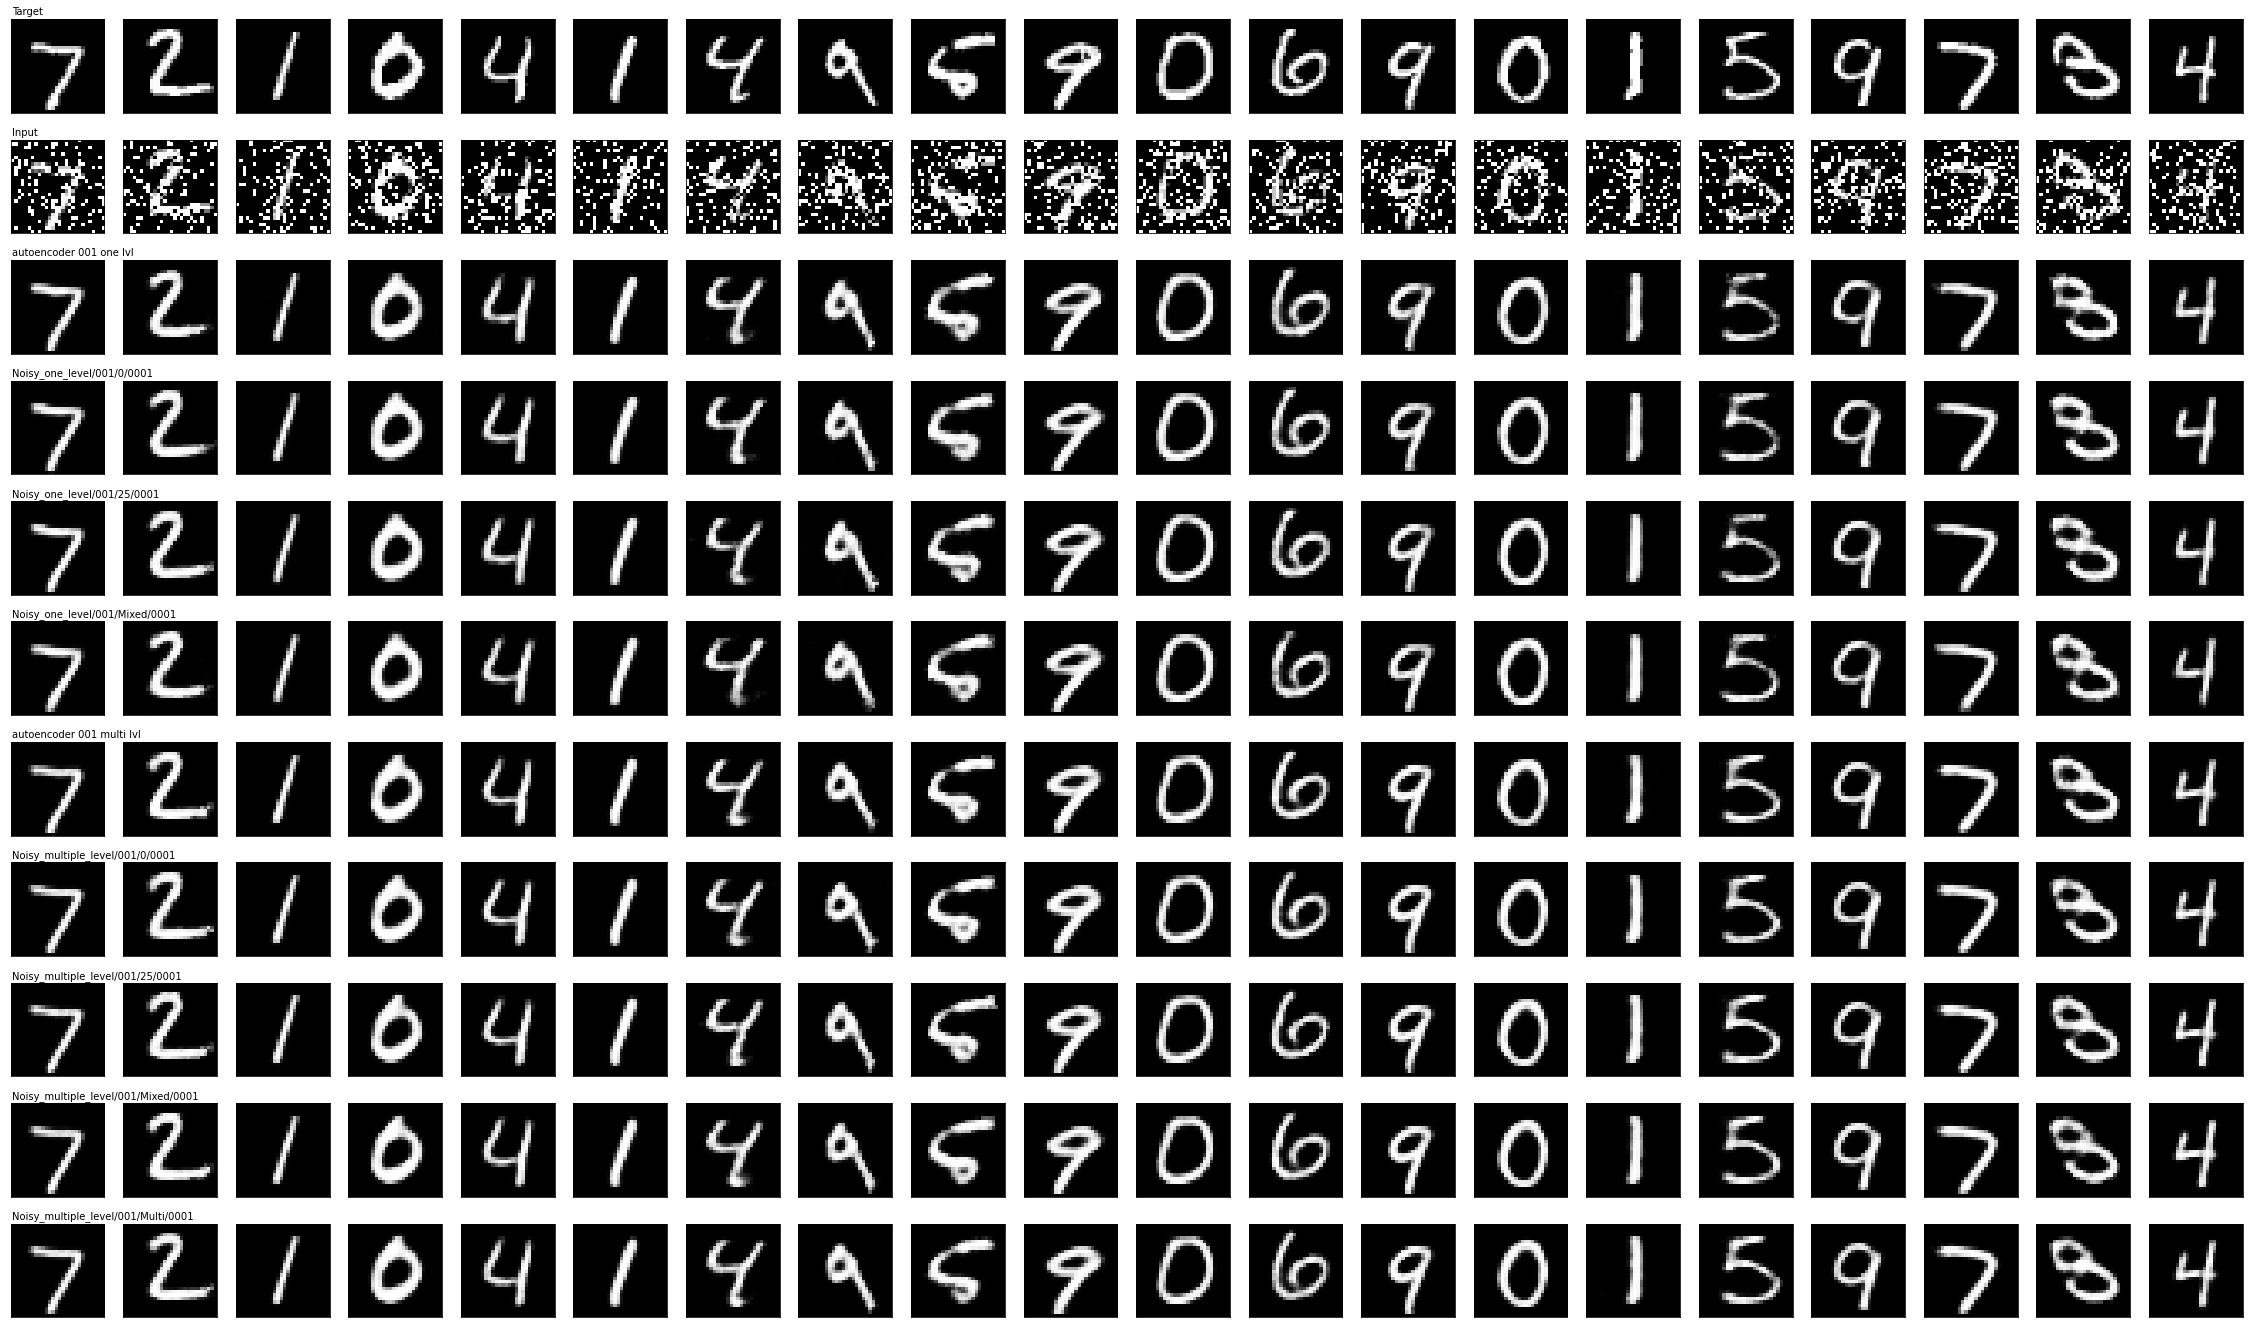

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data: Mnist with 80% Noise


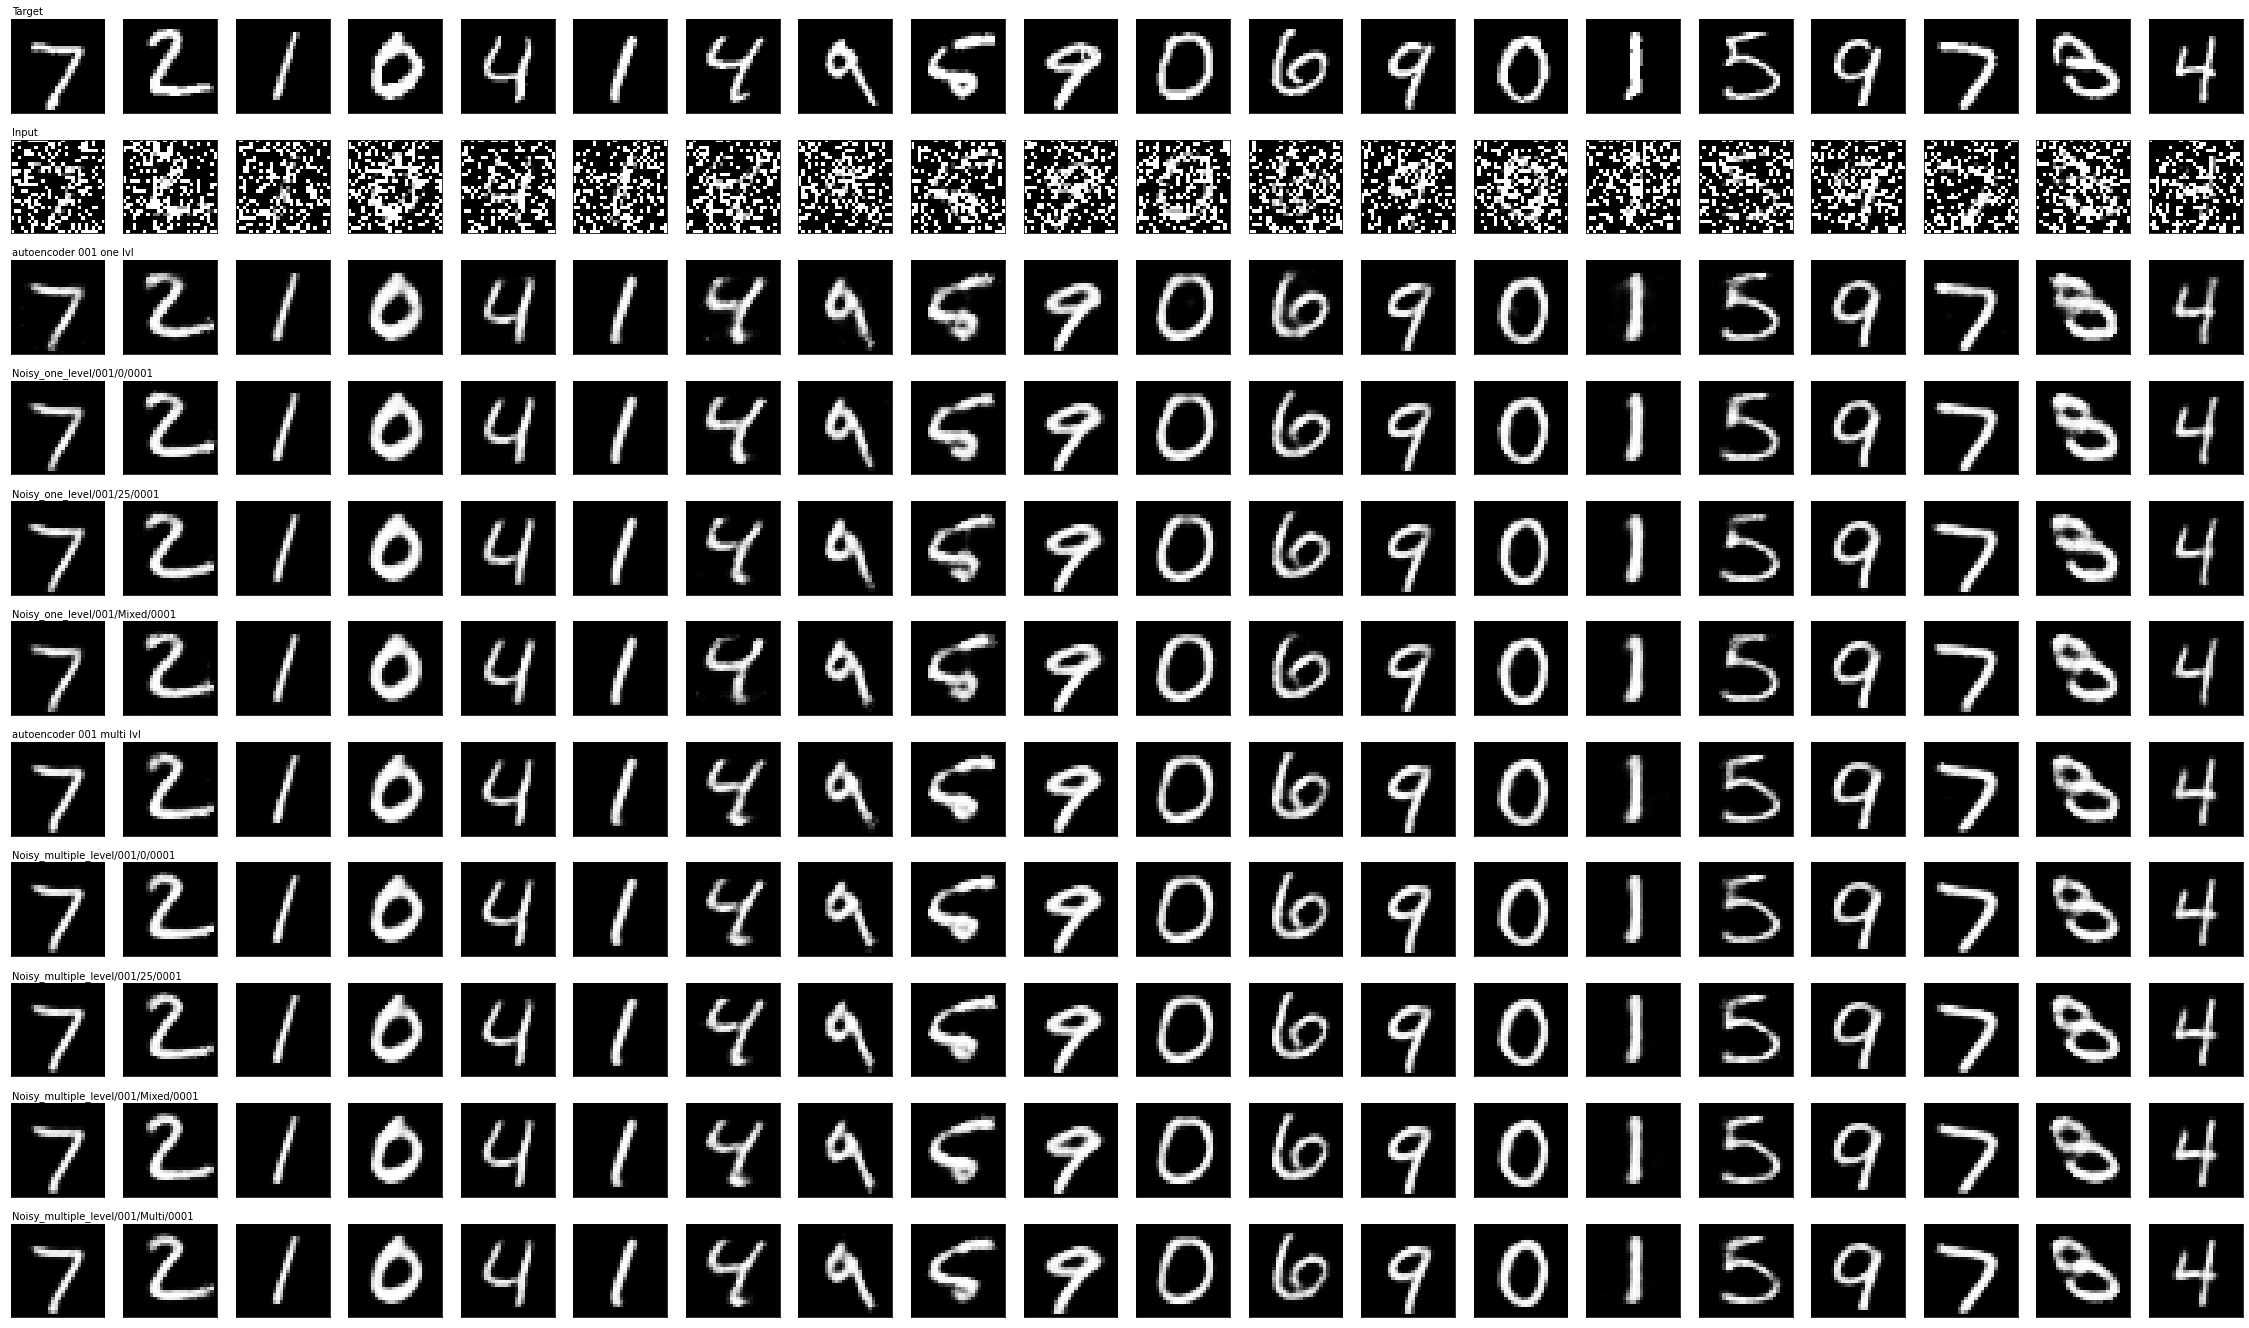

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data: Mnist with 100% Noise


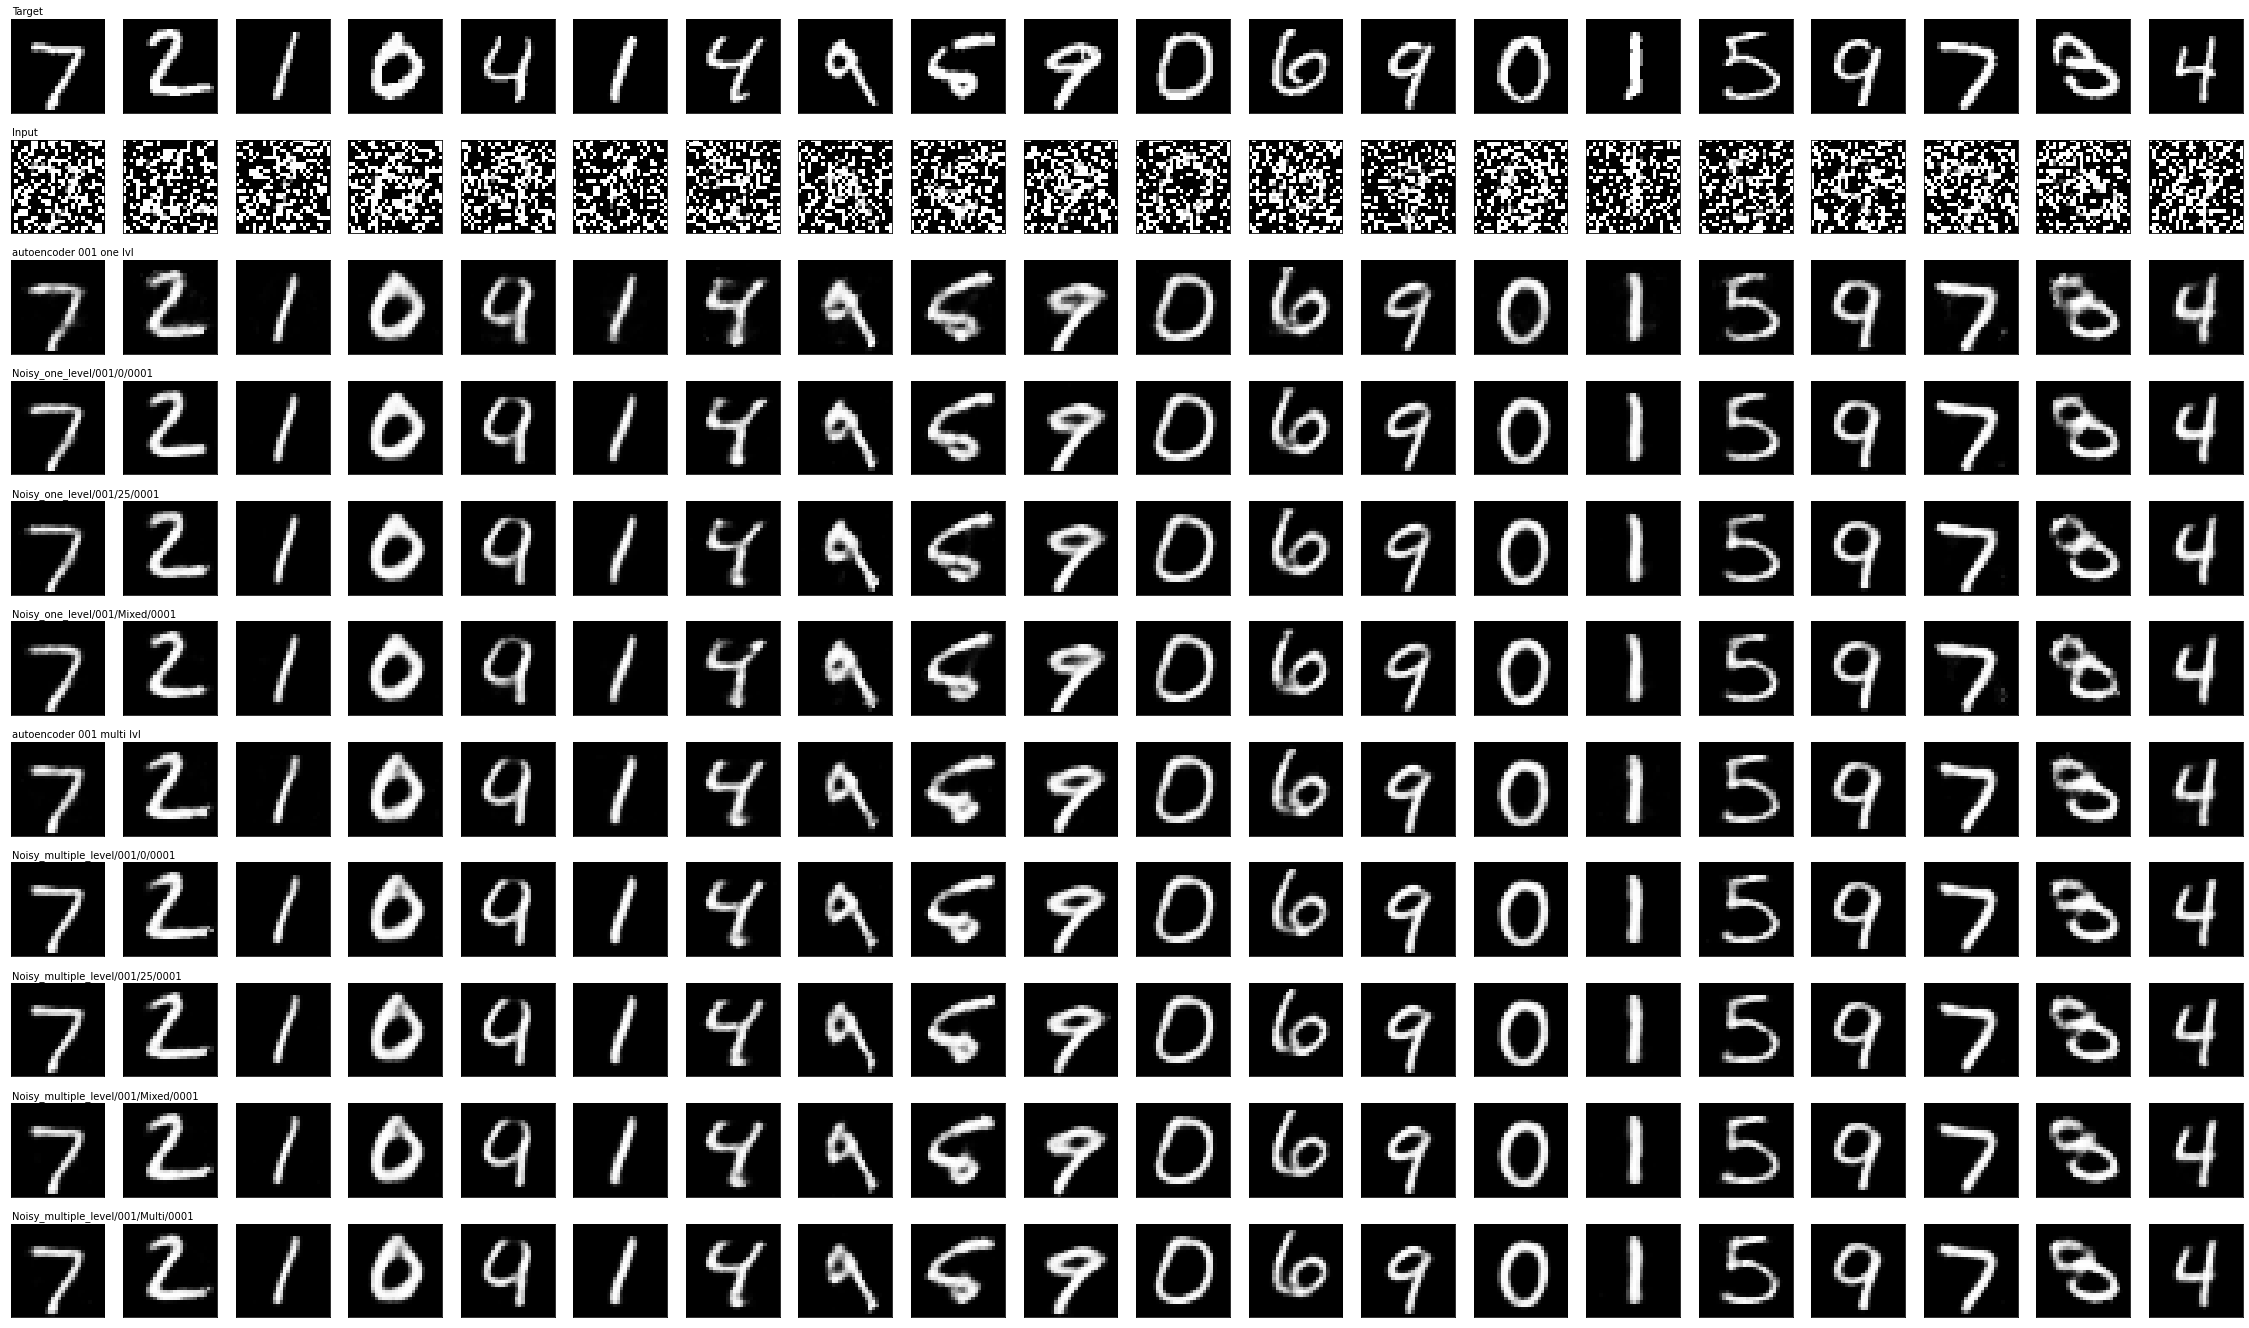

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data: Mnist with Mixed Noise levels


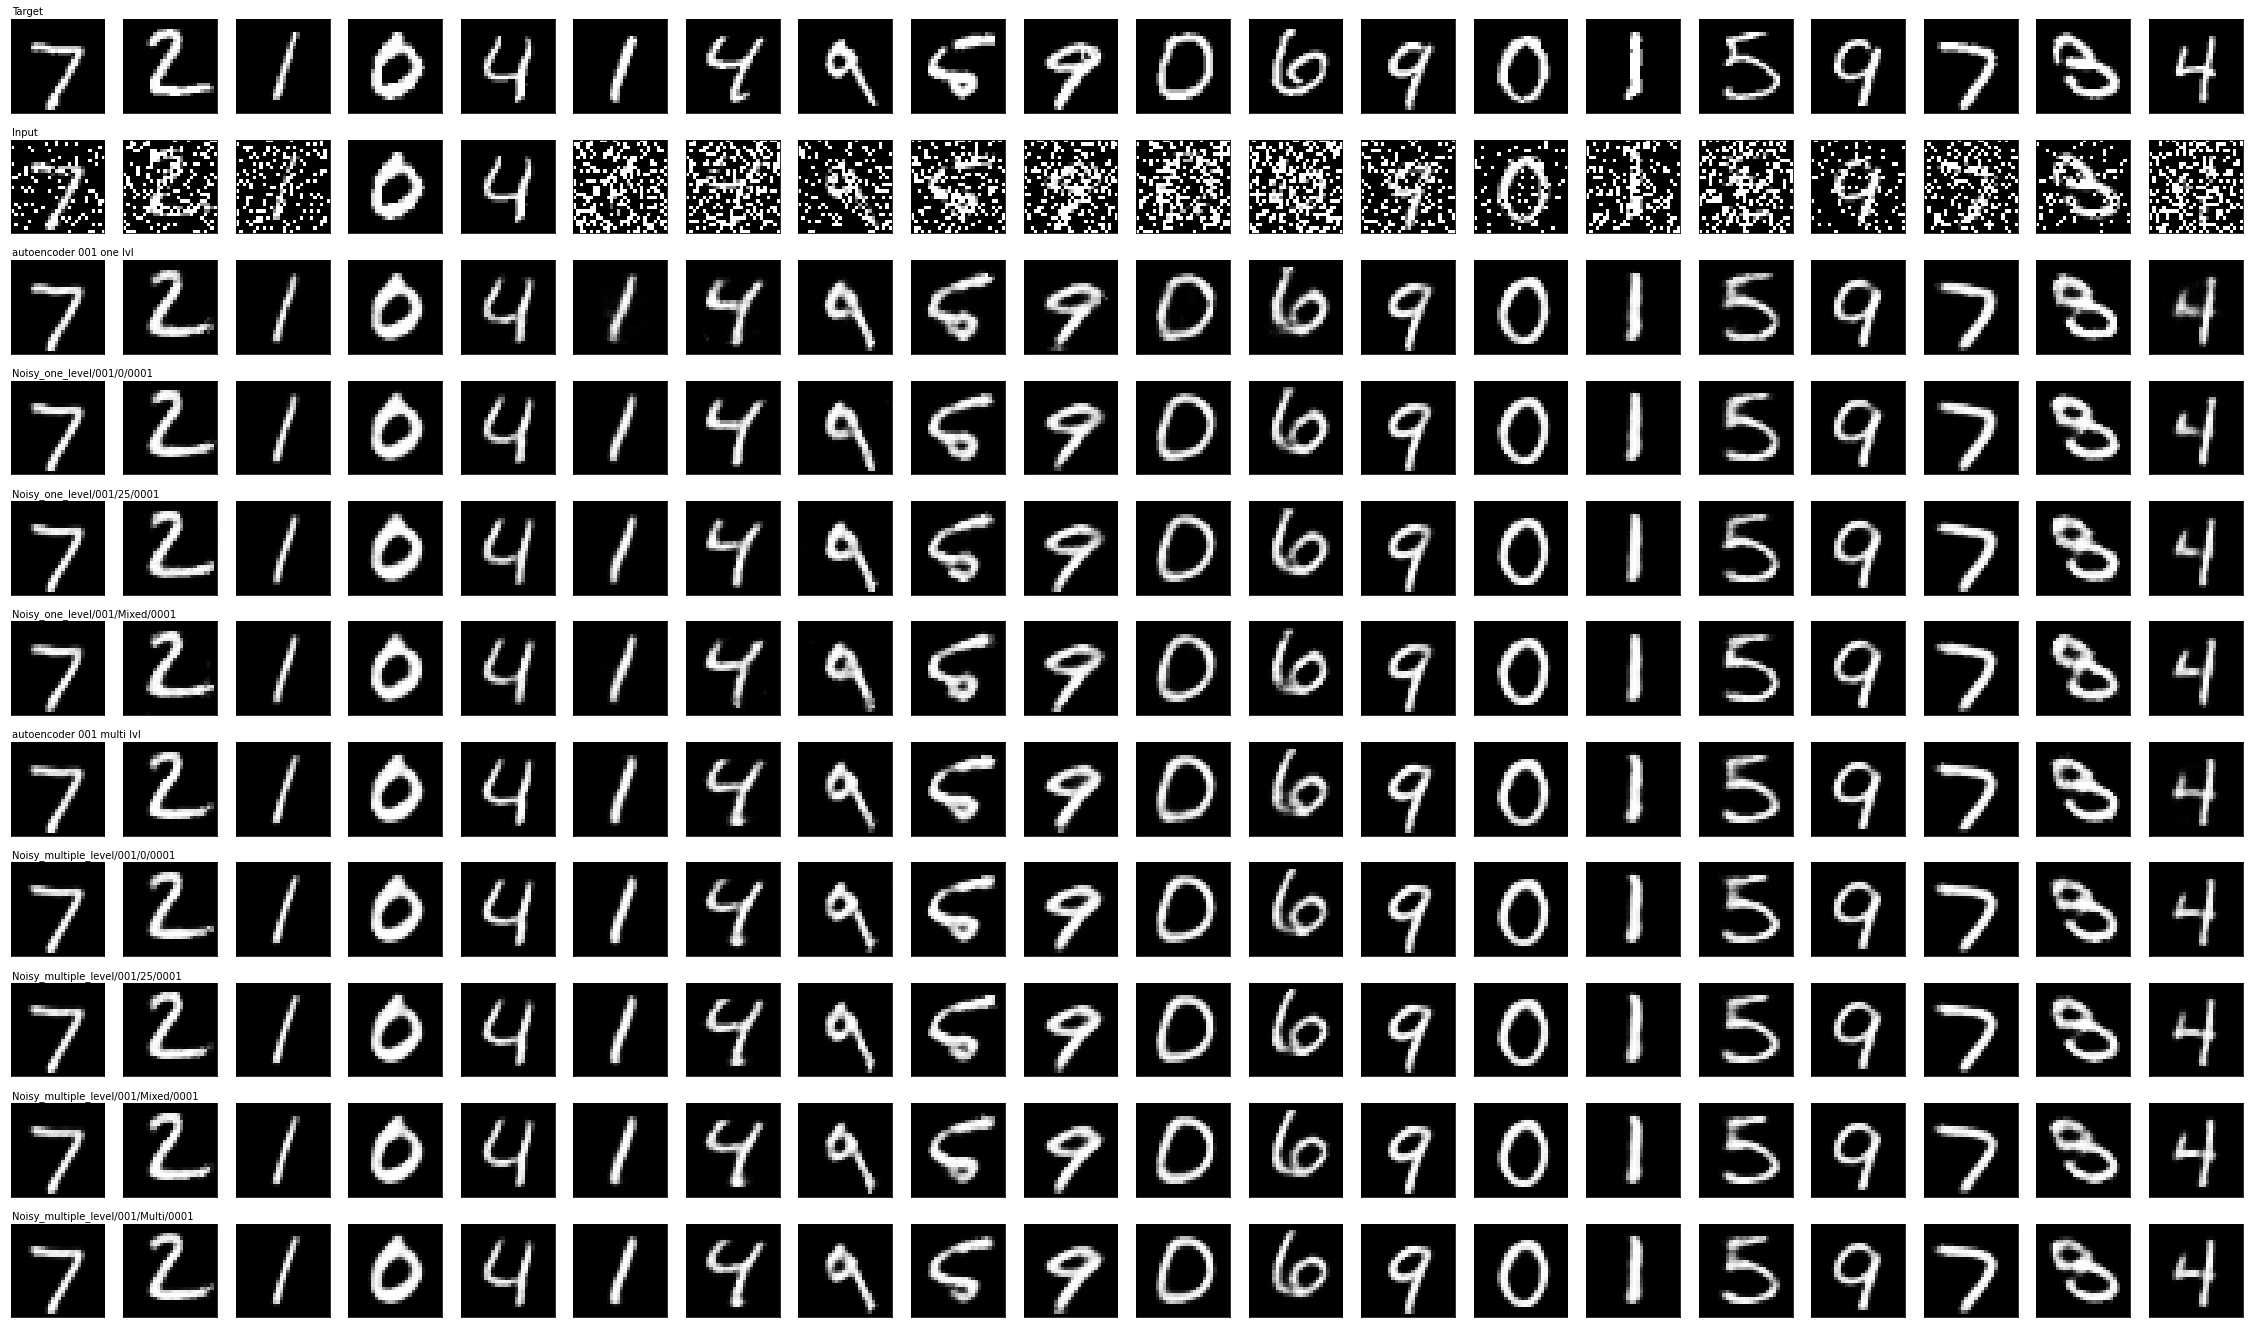

# Evaluation comments
For the metrics the ouput $y \in [-1,1]$ was trasformed to $\hat{y} \in [0,1]$ and then rounded to two decimal places, since we want to better observe the dieffernce betwen runs instead of the absolute value.   
For the classifier the data was not converted.

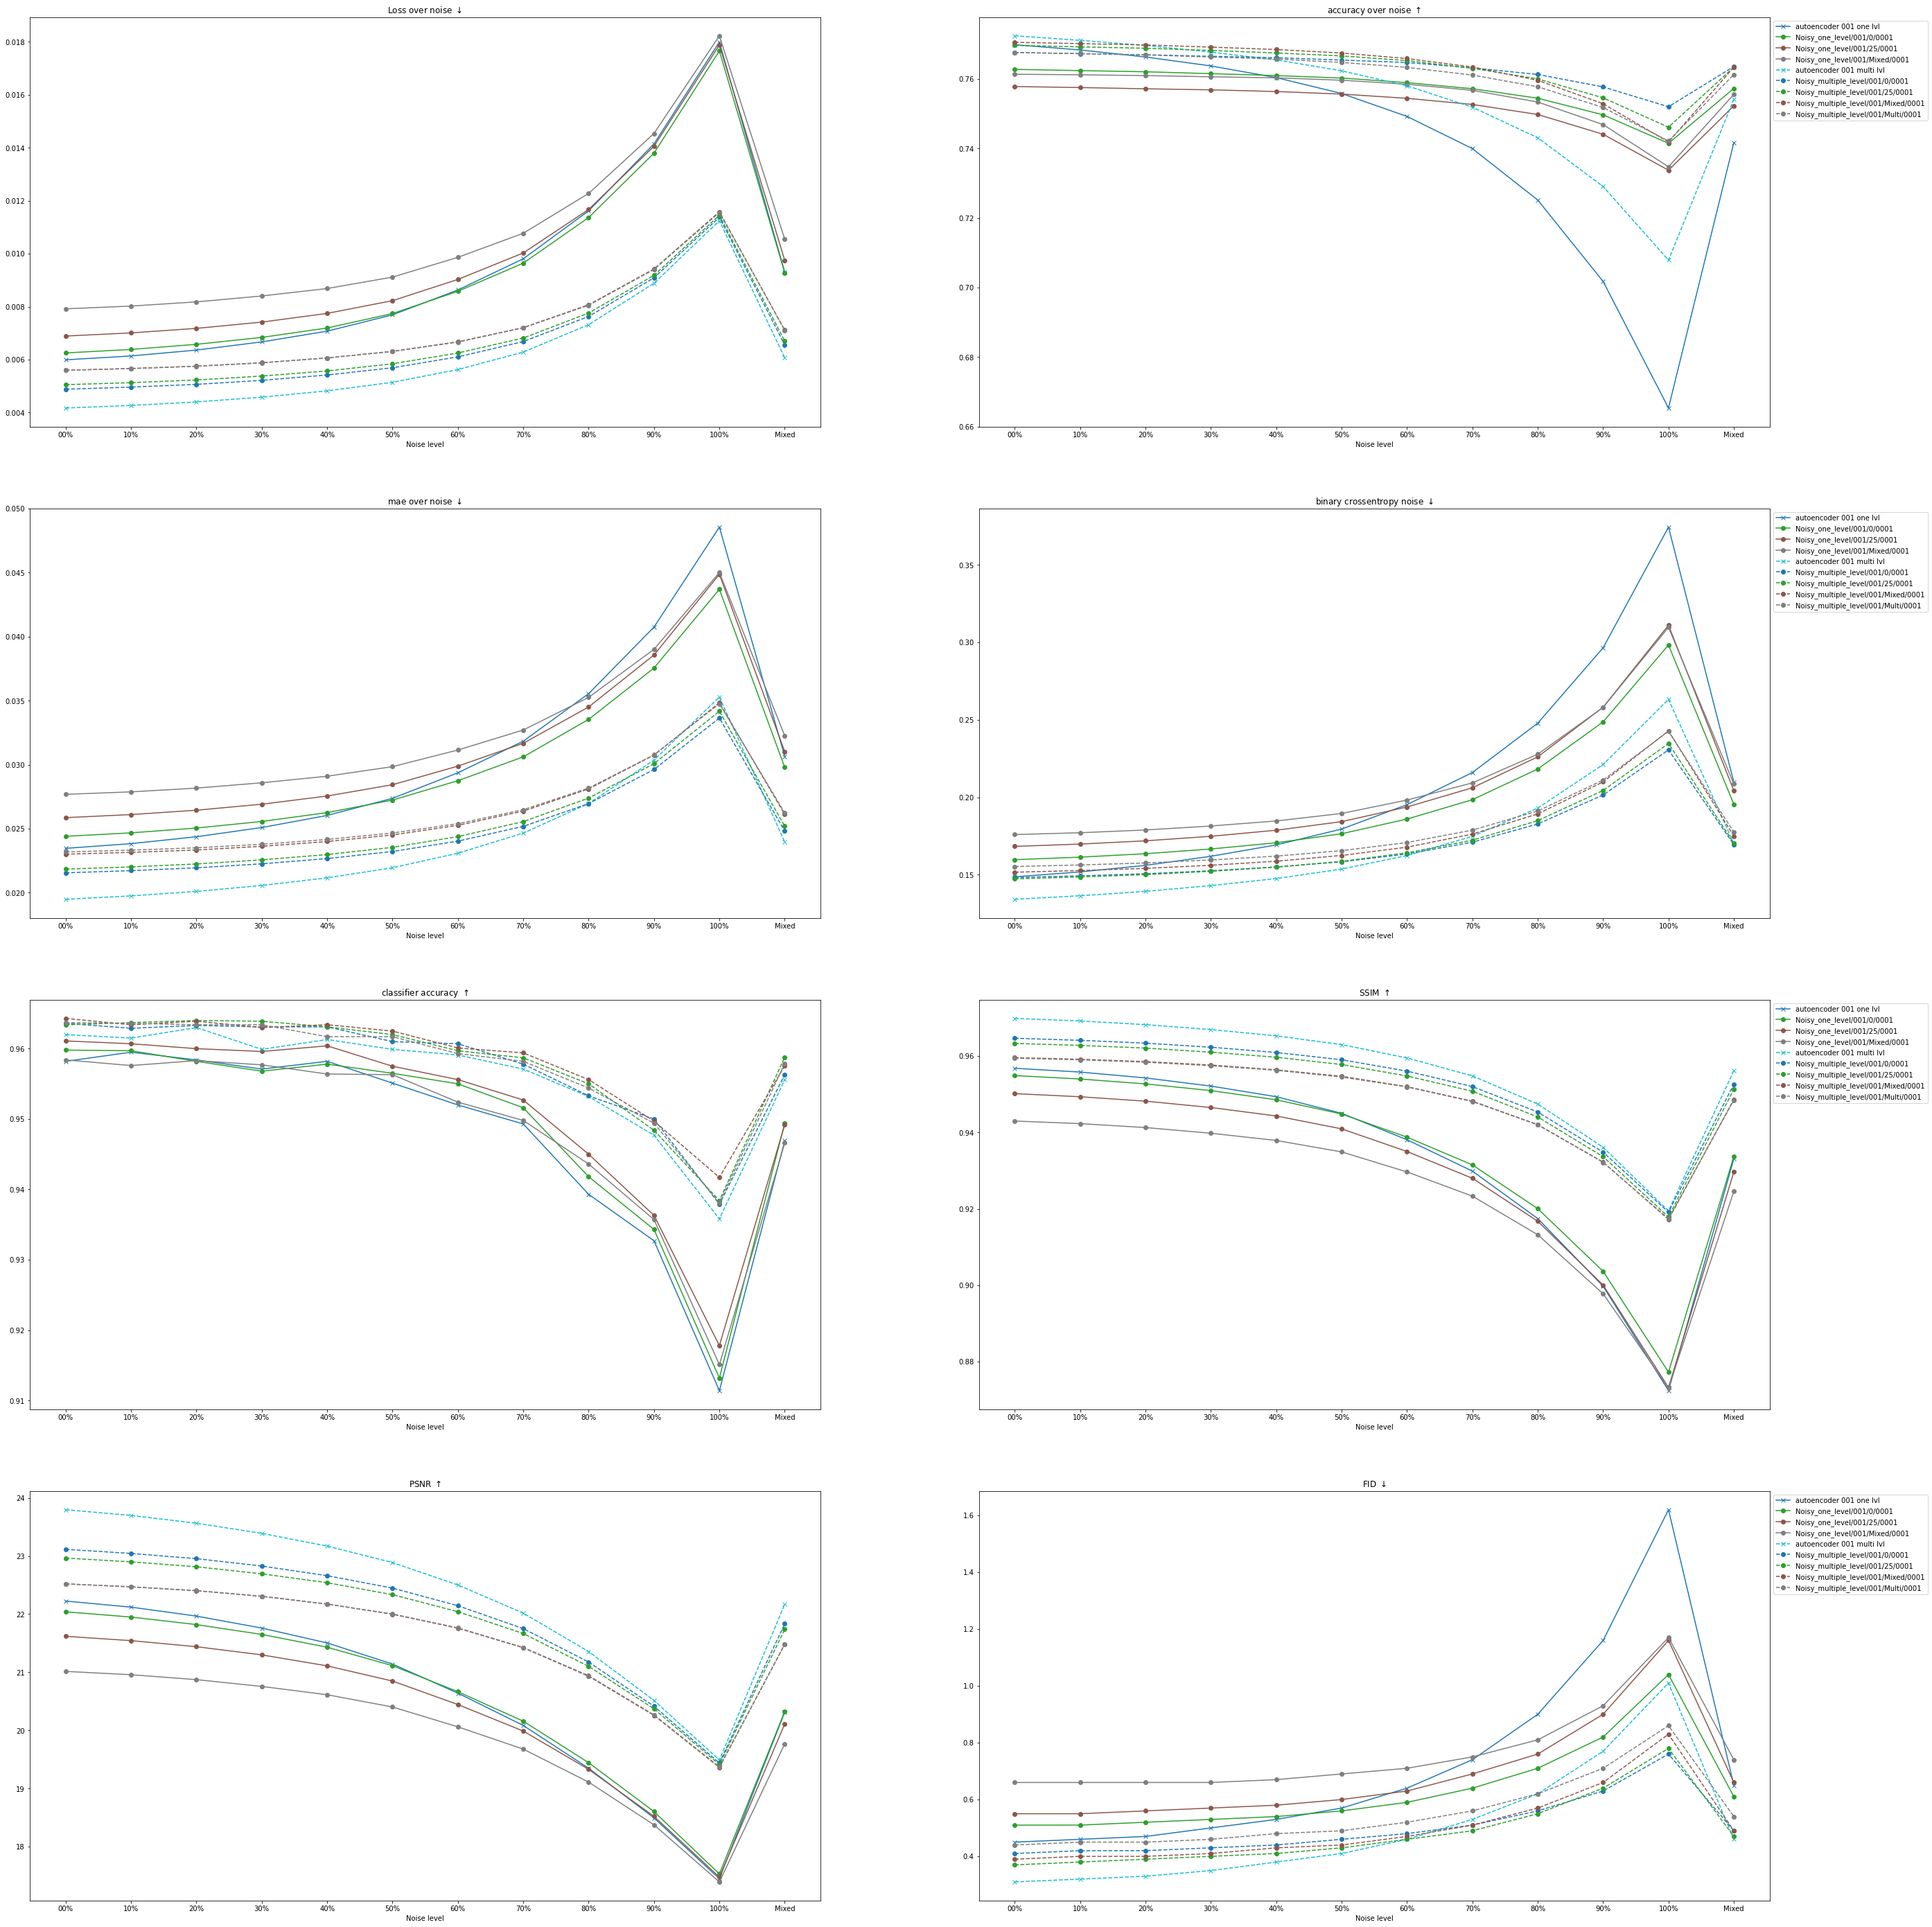

## Loss(MSE):
Vector of $n$ predictions from a sample of $n$ data points.  
$Y$ vector of observed values (targets)
$X$ vectror of predicted values 
mean squared error:
$$
\mathrm{MSE}=\frac{1}{n} \sum^{n}\left(Y_{i}-X_{i}\right)^{2}
$$

<a id='Accuracy'></a>
## Accuracy:
accuracy is the fraction of predictions the model got right. Formally, accuracy has the following definition: 
$$ \text{Accuracy} =\frac{\text { Number of correct predictions }}{\text { Total number of predictions }}$$

## MAE:
Mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. MAE is calculated as:
$$
\operatorname{MAE}=\frac{\sum_{i=1}^{n}\left|Y_{i}-X_{i}\right|}{n}
$$

## Binary crossentropy:

$$
\text { Binary crossentropy }=-\frac{1}{\text { n }} \sum^{\text {n }} Y_{i} \cdot \log X_{i}+\left(1-Y_{i}\right) \cdot \log \left(1-X_{i}\right)
$$
where $x_{i}$ is the $i$ -th value in the model output, $y_{i}$ is the corresponding target value, and output size is the number of values in the model output.

## Classifier accuracy:
Accuracy of a classifier trained on the "clean" MNIST dataset and evaluated on the predicted outputs of the autoencoders. (See [Accuracy](#Accuracy)
 above)

## SSIM:
The structural similarity index measure (SSIM) is a method for predicting the perceived quality of digital television and cinematic pictures, as well as other kinds of digital images and videos. SSIM is used for measuring the similarity between two images. The SSIM index is a full reference metric; in other words, the measurement or prediction of image quality is based on an initial uncompressed or distortion-free image as reference. [Wikipedia](https://www.wikiwand.com/en/Structural_similarity)  

#### Algorithm
The SSIM index is calculated on various windows of an image. The measure between two windows $x$ and $y$ of common size $\mathrm{N} \times \mathrm{N}$ ($11 \times 11$ Gaussian filter of width 1.5 is used in [tensorflow](https://www.tensorflow.org/api_docs/python/tf/image/ssim)) is:
$$\operatorname{SSIM}(x, y)=\frac{\left(2 \mu_{x} \mu_{y}+c_{1}\right)\left(2 \sigma_{x y}+c_{2}\right)}{\left(\mu_{x}^{2}+\mu_{y}^{2}+c_{1}\right)\left(\sigma_{x}^{2}+\sigma_{y}^{2}+c_{2}\right)}$$
with:
* $\mu_{x}$ the average of $x$;
* $\mu_{y}$ the average of $y$;
* $\sigma_{x}^{2}$ variance of $x_{i}$
* $\sigma_{y}^{2}$ the variance of $y$
* $\sigma_{x y}$ the covariance of $x$ and $y$
* $c_{1}=\left(k_{1} L\right)^{2}, c_{2}=\left(k_{2} L\right)^{2}$ two variables to stabilize the division with weak denominator;
* $L$ the dynamic range of the pixel-values
* $k_{1}=0.01$ and $k_{2}=0.03$ by default.

#### Formula components 
The SSIM formula is based on three comparison measurements between the samples of $x$ and $y:$ luminance $(l)$, contrast $(c)$ and structure $(s)$. The individual comparison functions are:
* $l(x, y)=\frac{2 \mu_{x} \mu_{y}+c_{1}}{\mu_{x}^{2}+\mu_{y}^{2}+c_{1}}$
* $c(x, y)=\frac{2 \sigma_{x} \sigma_{y}+c_{2}}{\sigma_{x}^{2}+\sigma_{y}^{2}+c_{2}}$
* $s(x, y)=\frac{\sigma_{x y}+c_{3}}{\sigma_{x} \sigma_{y}+c_{3}}$

with, in addition to above definitions:
* $ c_{3}=\frac{c_{2}}{ 2}$  

SSIM is then a weighted combination of those comparative measures:
$$\operatorname{SSIM}(x, y)=\left[l(x, y)^{\alpha} \cdot c(x, y)^{\beta} \cdot s(x, y)^{\gamma}\right]$$

Setting the weights $\alpha, \beta, \gamma$ to 1 , the formula can be reduced to the form shown above.

## PSNR:
Peak signal-to-noise ratio, often abbreviated PSNR, is an engineering term for the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. [Wikipedia](https://www.wikiwand.com/en/Peak_signal-to-noise_ratio#:~:text=Peak%20signal%2Dto%2Dnoise%20ratio%2C%20often%20abbreviated%20PSNR%2C,the%20fidelity%20of%20its%20representation.)
#### Definition
PSNR is most easily defined via the mean squared error (MSE). Given a noise-free $m \times n$ monochrome image $I$ and its noisy approximation $\mathrm{K}, \mathrm{MSE}$ is defined as:
$$
\operatorname{MSE}=\frac{1}{m n} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1}[I(i, j)-K(i, j)]^{2}
$$
The PSNR (in $\mathrm{dB}$ ) is defined as:
$$
\begin{aligned}
\operatorname{PSNR} &=10 \cdot \log _{10}\left(\frac{M A X_{I}^{2}}{M S E}\right) \\
&=20 \cdot \log _{10}\left(\frac{M A X_{I}}{\sqrt{M S E}}\right) \\
&=20 \cdot \log _{10}\left(M A X_{I}\right)-10 \cdot \log _{10}(M S E)
\end{aligned}
$$
Here, MAX is the maximum possible pixel value of the image ($1$ in our case).  
In [tensprflow](https://www.tensorflow.org/api_docs/python/tf/image/psnr) the implementation uses sets of images instead of single images.


## FID:
The Frechet Inception Distance score, or FID for short, is a metric that calculates the distance between feature vectors calculated for real and generated images.  

The score summarizes how similar the two groups are in terms of statistics on computer vision features of the raw images calculated using the inception v3 model used for image classification. Lower scores indicate the two groups of images are more similar, or have more similar statistics, with a perfect score being 0.0 indicating that the two groups of images are identical.

The FID score is used to evaluate the quality of images generated by generative adversarial networks, and lower scores have been shown to correlate well with higher quality images.([Source](https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/))

#### Equation:
$$d^2 = ||\mu_1 – \mu_2||^2 + \operatorname{Tr} \left[ \Sigma_1 + \Sigma_2 – 2*\operatorname{sqrt} \left( \Sigma_1*\Sigma_2 \right) \right]$$

The score is referred to as $d^2$, showing that it is a distance and has squared units.

The $\mu_1$ and $\mu_2$ refer to the feature-wise mean of the real and generated images, e.g. $2048$ element vectors where each element is the mean feature observed across the images.

The $\Sigma_1$ and $\Sigma_2$ are the covariance matrix for the real and generated feature vectors.

The $||\mu_1 – \mu_2||^2$ refers to the sum squared difference between the two mean vectors. $\operatorname{Tr}$ refers to the trace linear algebra operation, e.g. the sum of the elements along the main diagonal of the square matrix.

The $\operatorname{sqrt}$ is the square root of the square matrix, given as the product between the two covariance matrices.



# TSNE
t-distributed stochastic neighbor embedding (t-SNE) of the reconstructed images.

Noise 0%


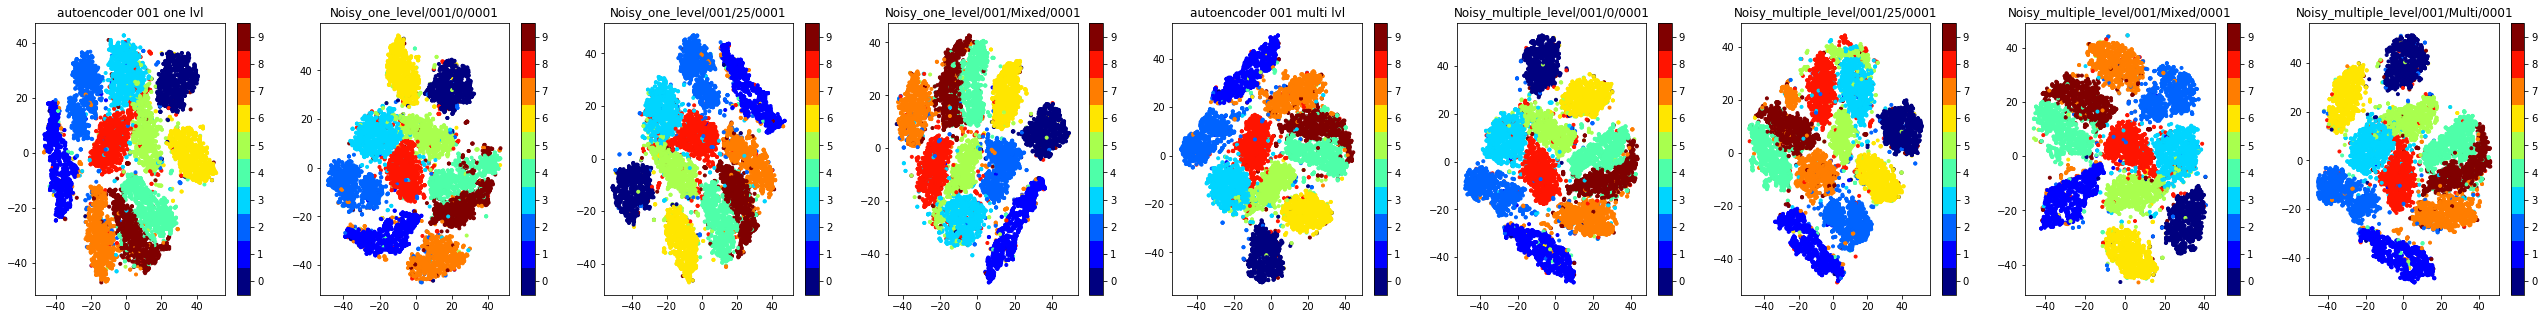

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Noise 20%


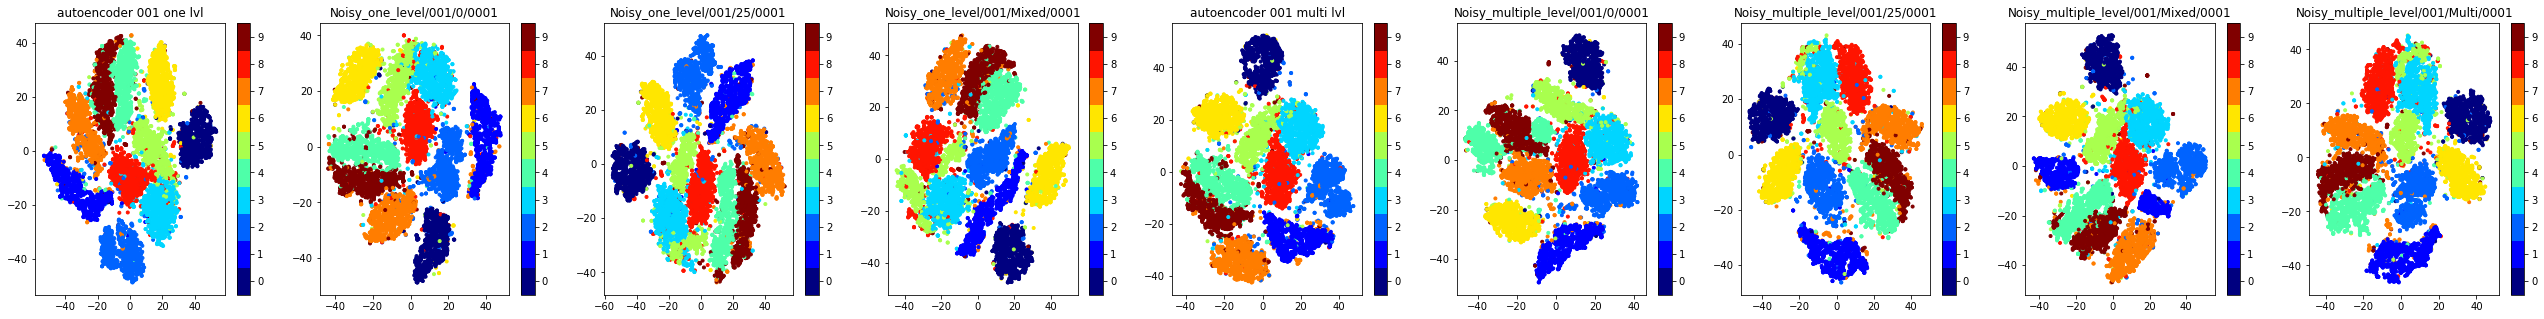

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Noise 50%


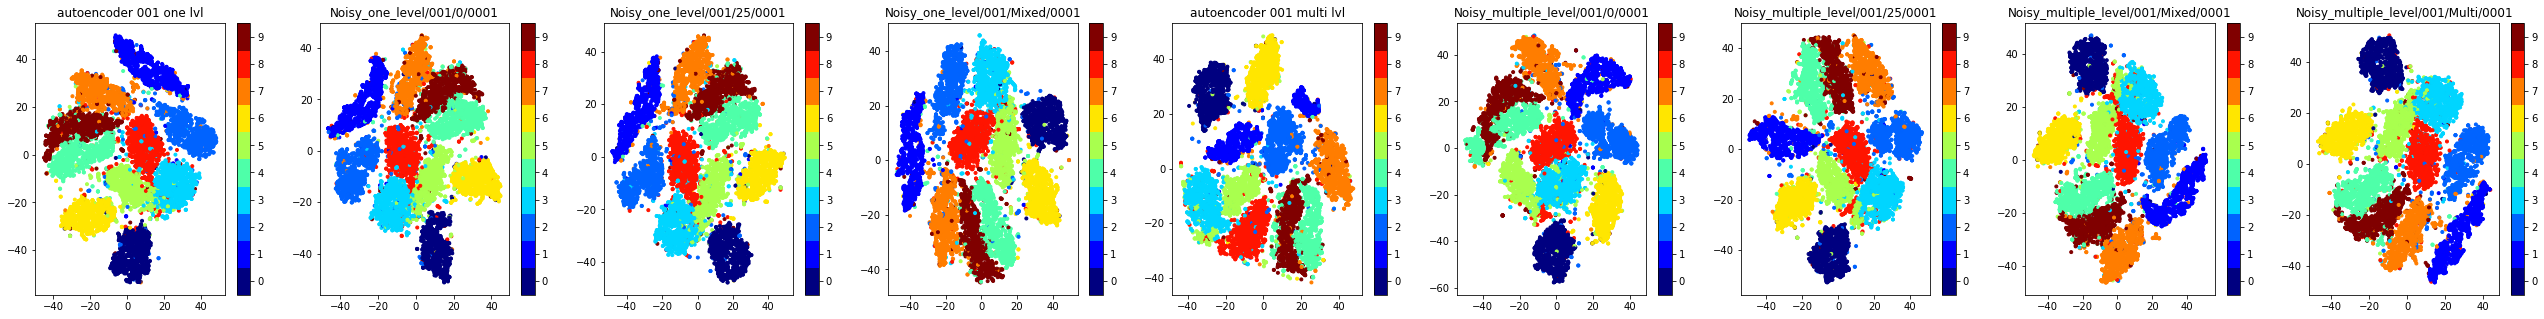

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Noise 80%


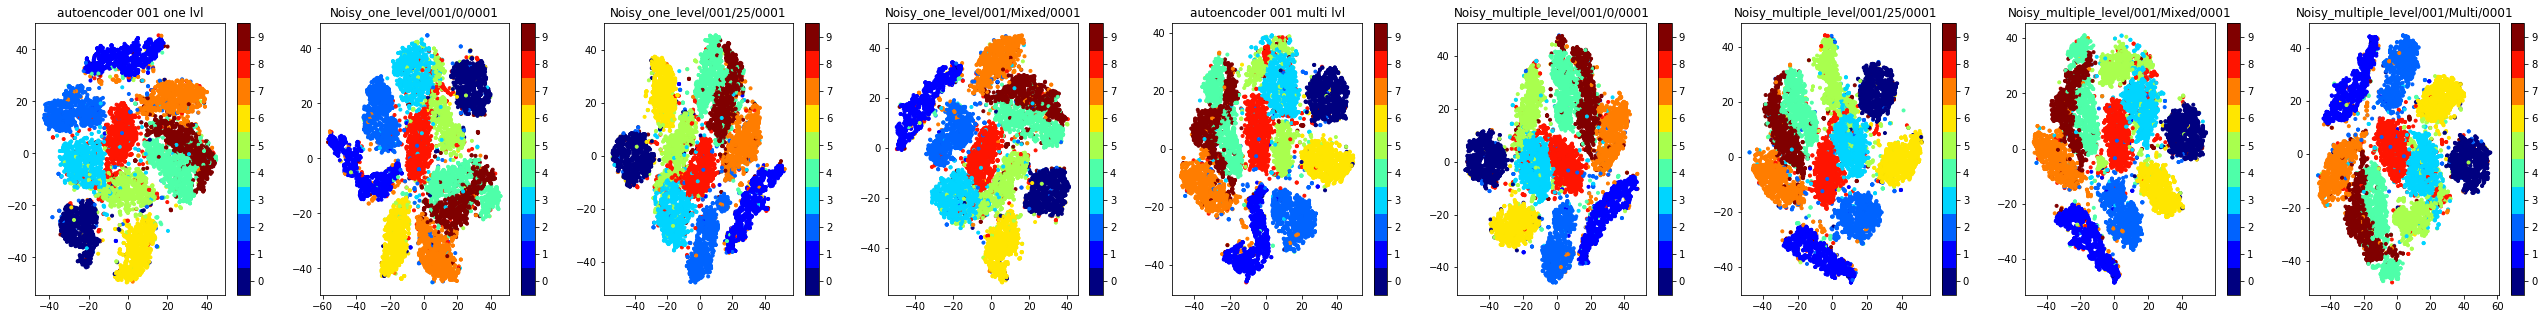

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Noise 100%


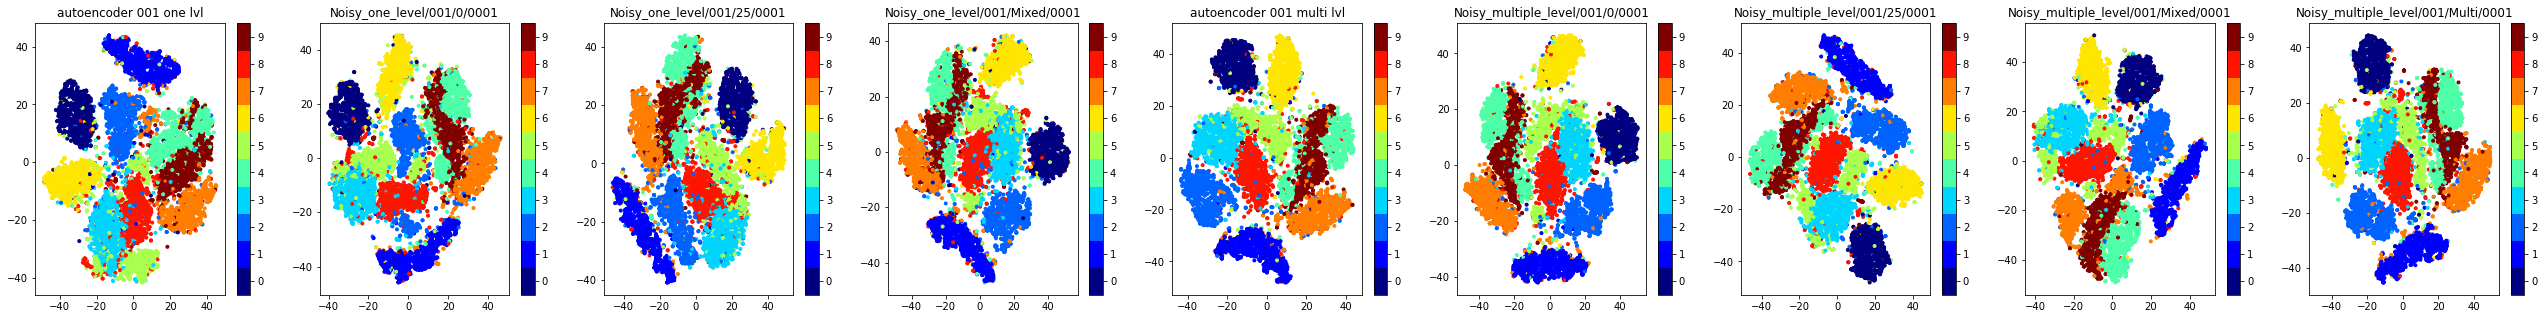

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mixed


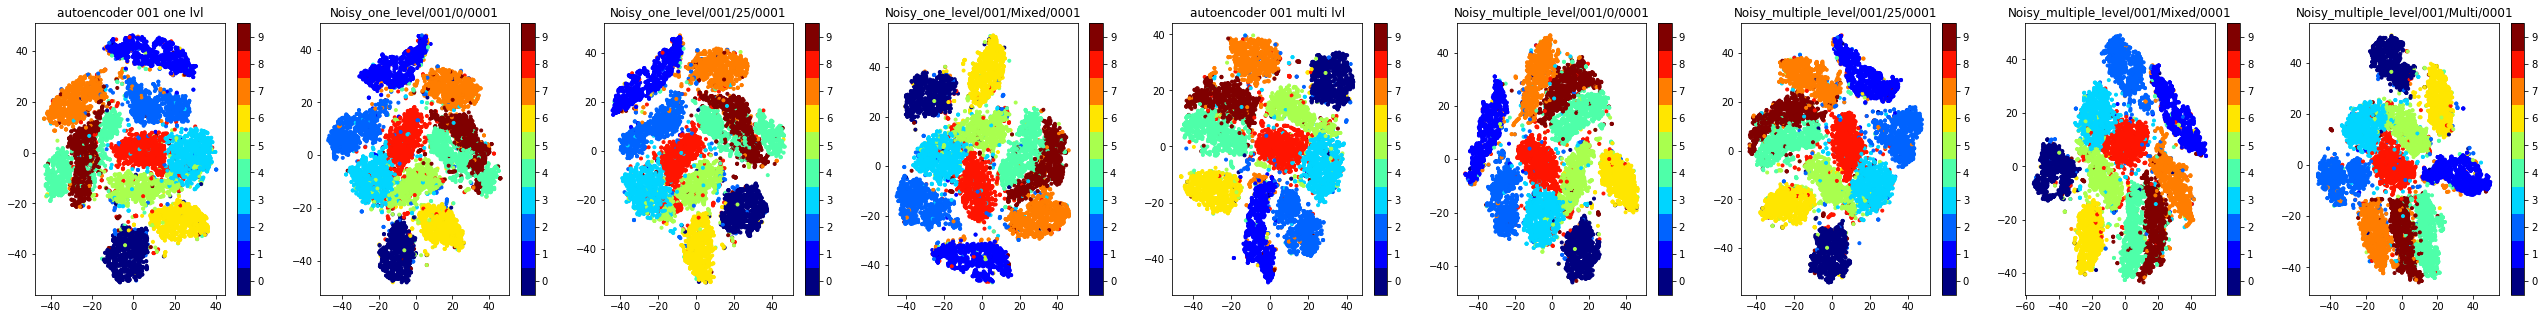

# Remarks
## Training and validation data renoising
The test data that was used in validation for the training was renoised in a random mixed form while the input data for training was renoised with an equal noise lvl, with the idea of simulating real world case for the validation. Butin the iteration renoising the prediction of the validation data and the input data was equaly renoised instead of the validation set being randomly renoised.

## Accuracy
Acc means equal pixels are more but unequal pixels have a higher difference.
